### EDA of Steam review dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train_gr/train.csv')
df.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [3]:
df.isnull().sum()

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


In [19]:
df = df.dropna()
df = df.drop(columns=['review_id'],axis=1)

In [20]:
df.describe()

,year,user_suggestion
count,17316.000000,17316.000000
mean,2016.388427,0.570975
std,1.390356,0.494951
min,2011.000000,0.000000
25%,2015.000000,0.000000
50%,2017.000000,1.000000
75%,2018.000000,1.000000
max,2018.000000,1.000000


In [53]:
n_games = df['title'].nunique()
print(f'Games Reviewed: {n_games}')

Games Reviewed: 44


In [21]:
bad_review = len(df[df['user_suggestion'] == 0])
good_review = len(df[df['user_suggestion'] == 1])
total_reviews = len(df)

print(f'Good Review %: {round(good_review/total_reviews * 100)}%\nBad Review %: {round(bad_review/total_reviews * 100)}%')

Good Review %: 57%
Bad Review %: 43%


There doesn't look to be a severe class imbalance in the dataset so we most likely don't  
need to upsample the minory or downsample the majority classes

Let's explore our data some more, we'll see what games received the most reviews in our dataset

In [76]:
most_reviewed = df.groupby(['title']).count().sort_values(by='user_suggestion',ascending=False)
most_reviewed.head()

,year,user_review,user_suggestion
title,,,
Robocraft,840,840,840
Eternal Card Game,780,780,780
Heroes & Generals,737,737,737
Fractured Space,717,717,717
War Thunder,703,703,703


We see that a majority of the most reviewed games are free to play

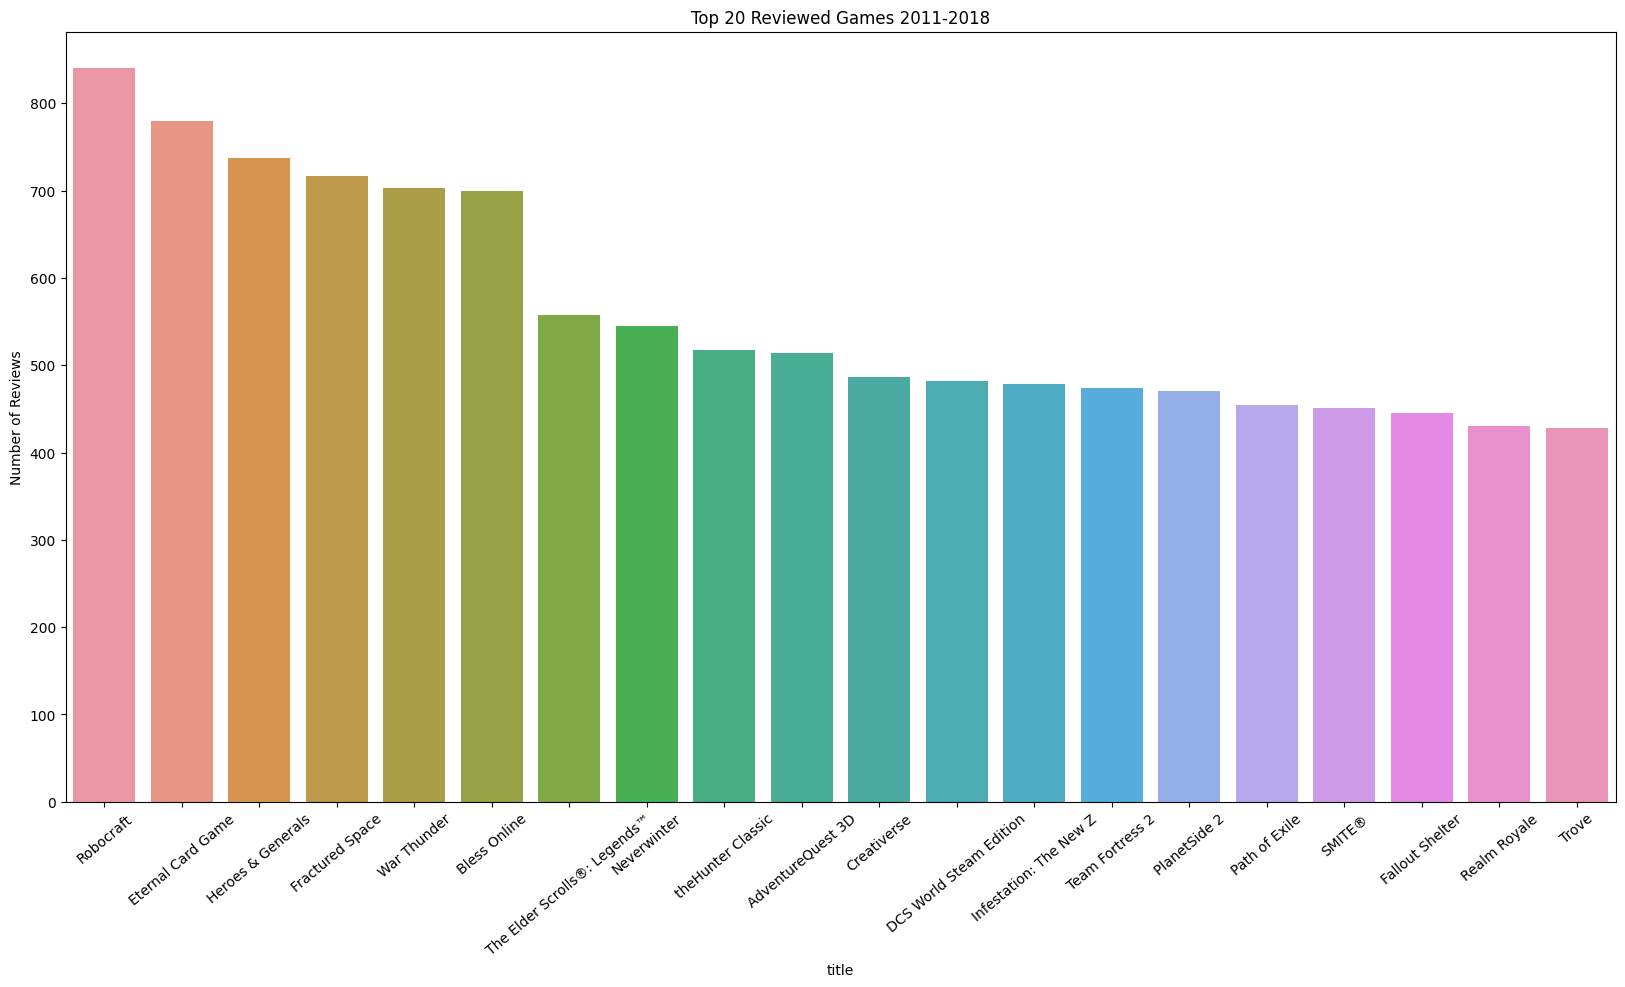

In [87]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=most_reviewed.iloc[:20],
                x=most_reviewed.iloc[:20].index,
                y='user_suggestion')
plt.title('Most Reviewed Games 2011-2018')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=40)
plt.show()

Let's now preprocess the data for our model

In [91]:
data = df[['user_review','user_suggestion']].copy()
data.head()

,user_review,user_suggestion
0,I'm scared and hearing creepy voices. So I'll...,1
1,"Best game, more better than Sam Pepper's YouTu...",1
2,"A littly iffy on the controls, but once you kn...",1
3,"Great game, fun and colorful and all that.A si...",1
4,Not many games have the cute tag right next to...,1


In [92]:
data['user_review'] = data['user_review'].str.replace(r'<[^<>]*>', '', regex=True)
data['user_review'] = data['user_review'].str.replace(r'[^A-Za-z0-9 ]+', '', regex=True)
data['user_review'] = data['user_review'].str.lower()

data.head()

,user_review,user_suggestion
0,im scared and hearing creepy voices so ill pa...,1
1,best game more better than sam peppers youtube...,1
2,a littly iffy on the controls but once you kno...,1
3,great game fun and colorful and all thata side...,1
4,not many games have the cute tag right next to...,1


In [93]:
data.to_csv('data/train_gr/train_clean.csv',index=False)